# Problem Statement

Predict the quality of wine based on the input variables: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol

In [1]:
import pandas as pd
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Exploratory Data Analysis

In [3]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [4]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
from collections import Counter
Counter(data['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

<AxesSubplot:xlabel='quality', ylabel='count'>

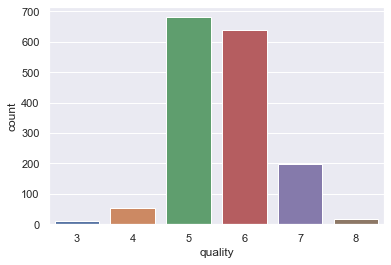

In [6]:
#count of the target variable
sb.countplot(x='quality', data=data)

In [7]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
#_deepnote_run_altair(data, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"fixed acidity","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"volatile acidity","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Cleaning The Dataset

Number of outliers (fixed acidity): 49


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

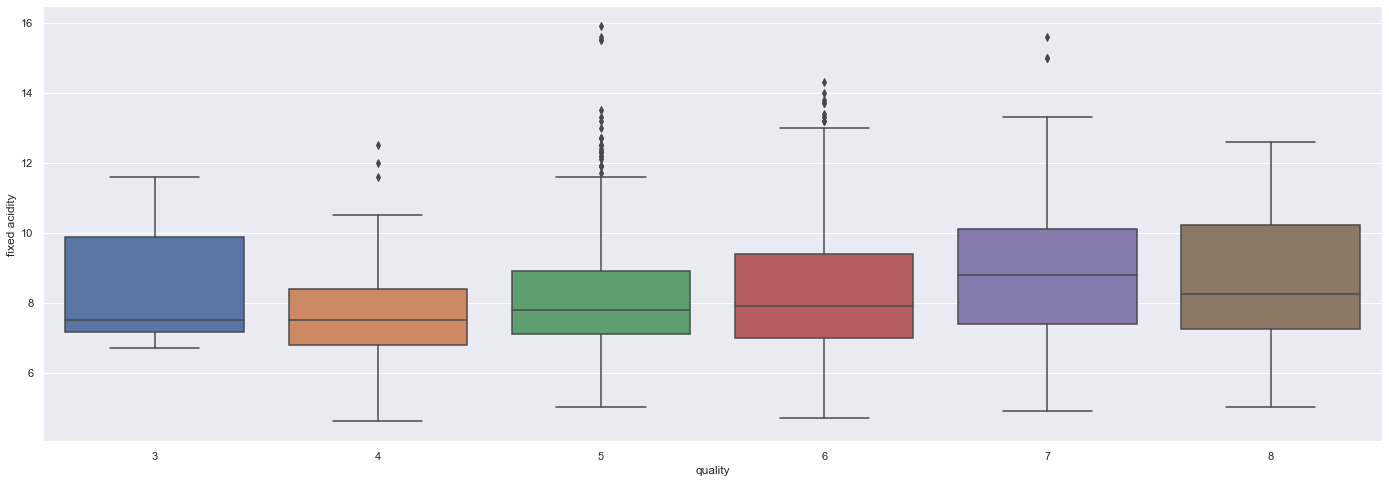

In [11]:
def iqr_outliers(df, var):
    q1=df[var].quantile(0.25)
    q3=df[var].quantile(0.75)
    iqr = q3 - q1
    count = ((df[var]<(q1 - 1.5*iqr)) | (df[var]>(q3 + 1.5*iqr))).sum()
    print("Number of outliers (" + var + "): " + str(count))
    return count

iqr_outliers(data, "fixed acidity")
plt.figure(figsize = (24,8))
sb.boxplot(x='quality', y='fixed acidity', data=data)

In [12]:
outlier_total_count = 0
for column in data.columns:
    outlier_total_count +=iqr_outliers(data, column)
print(outlier_total_count)    

Number of outliers (fixed acidity): 49
Number of outliers (volatile acidity): 19
Number of outliers (citric acid): 1
Number of outliers (residual sugar): 155
Number of outliers (chlorides): 112
Number of outliers (free sulfur dioxide): 30
Number of outliers (total sulfur dioxide): 55
Number of outliers (density): 45
Number of outliers (pH): 35
Number of outliers (sulphates): 59
Number of outliers (alcohol): 13
Number of outliers (quality): 28
601


In [13]:
q1 = data['alcohol'].quantile(0.25)
q3 = data['alcohol'].quantile(0.75)
iqr = q3 - q1
truth_values = []
truth_values.append(data['alcohol'] < (q1-1.5*iqr))
truth_values.append(data['alcohol'] > (q3+1.5*iqr))
print(truth_values[0:])

[0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: alcohol, Length: 1599, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: alcohol, Length: 1599, dtype: bool]


## Total Number of Outliers

In [14]:
def iqr_outliers_value(df, var):
    q1=df[var].quantile(0.25)
    q3=df[var].quantile(0.75)
    iqr = q3 - q1
    return ((df[var]<(q1 - 1.5*iqr)) | (df[var]>(q3 + 1.5*iqr)))

truth_value = 0
for column in data.columns:
    if column == 'quality':
        continue
    truth_value = truth_value | iqr_outliers_value(data,column)

print(truth_value.sum())    

405


In [15]:
for column in data.columns:
    median = data[column].quantile(0.5)
    outliers = data[column].loc[truth_value]
    #print(outliers)
    for outlier in outliers:
        outliers = outliers.replace(outlier, median)

In [16]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 

In [17]:
data.loc[~truth_value].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.276094,0.662847,0.231532,0.198035,-0.150230,-0.089681,0.607073,-0.684880,0.160881,-0.039232,0.110671
volatile acidity,-0.276094,1.000000,-0.629348,0.027077,0.111543,-0.016616,0.101674,0.043313,0.229799,-0.317344,-0.222267,-0.352215
citric acid,0.662847,-0.629348,1.000000,0.154331,0.072543,-0.071628,-0.001035,0.302619,-0.476570,0.257355,0.141529,0.219897
residual sugar,0.231532,0.027077,0.154331,1.000000,0.233496,0.084554,0.192671,0.393740,-0.058399,0.044741,0.099033,0.015439
chlorides,0.198035,0.111543,0.072543,0.233496,1.000000,0.013656,0.174651,0.412369,-0.175306,-0.081237,-0.303733,-0.192271
free sulfur dioxide,-0.150230,-0.016616,-0.071628,0.084554,0.013656,1.000000,0.619431,-0.024581,0.144422,0.103176,-0.020682,-0.002788
total sulfur dioxide,-0.089681,0.101674,-0.001035,0.192671,0.174651,0.619431,1.000000,0.147349,0.013407,-0.051740,-0.242882,-0.198539
density,0.607073,0.043313,0.302619,0.393740,0.412369,-0.024581,0.147349,1.000000,-0.222901,0.070257,-0.546062,-0.236333
pH,-0.684880,0.229799,-0.476570,-0.058399,-0.175306,0.144422,0.013407,-0.222901,1.000000,0.012666,0.118833,-0.075724
sulphates,0.160881,-0.317344,0.257355,0.044741,-0.081237,0.103176,-0.051740,0.070257,0.012666,1.000000,0.272494,0.415356


In [18]:
clean = data.loc[~truth_value]
clean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
y = clean['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1194, dtype: int64

In [20]:
x = clean.drop(columns='quality')
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


clean

In [21]:
clean['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [22]:
#Split quality into classes
qualbool = []
for i in clean['quality']:
    if i>=1 and i<=5:
        qualbool.append('0')
    elif i>=6 and i <=10:
        qualbool.append('1')
clean['QualBool'] = qualbool

clean.head()

<ipython-input-22-c1e94c967de0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['QualBool'] = qualbool


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QualBool
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [23]:
Counter(clean["QualBool"])

Counter({'0': 549, '1': 645})

# Modelling

## Decision Tree 

In [24]:
#split dataset into variables vs quality
X = clean.drop(['quality', 'QualBool'], axis=1)
y = clean.QualBool

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_transformed = sc.fit_transform(X)
print(X_transformed)

[[-0.52486851  1.07557292 -1.37745204 ...  1.40819588 -0.62157622
  -0.98980466]
 [-0.25099415  2.16773768 -1.37745204 ... -0.93894522  0.41159595
  -0.57963804]
 [-0.25099415  1.43962784 -1.15539334 ... -0.48465984  0.15330291
  -0.57963804]
 ...
 [-1.27802301 -0.07726766 -0.65576128 ...  0.72676782  1.01427971
   0.65086184]
 [-1.55189737  0.74185591 -0.71127595 ...  1.86248126  0.66988899
  -0.16947141]
 [-1.48342878 -1.29078406  1.23173765 ...  0.49962513  0.23940059
   0.65086184]]


In [26]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_transformed)

##### A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

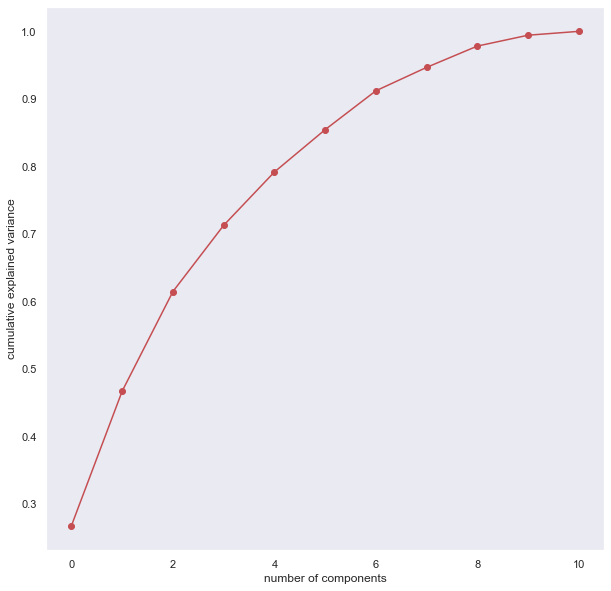

In [27]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()


In [28]:
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X_transformed)
print(X_new)

[[-1.61216058 -1.33935046 -1.25890521 ... -0.5530158  -0.41980149
   0.49384368]
 [-0.36500087 -2.63821539  0.44541547 ...  0.18883872  2.0967175
  -0.5668026 ]
 [-0.40667312 -1.72091885 -0.45588474 ...  0.19812503  1.22498197
  -0.50743433]
 ...
 [-1.46199211  0.25188839  1.72575267 ...  0.2491408   0.32619447
   0.02057421]
 [-2.52923676 -0.54674447  1.59690907 ...  0.08220831  0.06995508
   0.67601037]
 [ 0.11398033  0.94746751  1.90057696 ... -0.1416234  -2.01376342
  -1.42984059]]


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9612565445026178

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7489539748953975



'f = plt.figure(figsize=(100,100))\nplot_tree(dectree, filled=True, rounded=True,\n          feature_names = X.columns,\n          class_names=["Not Good","Good"])'

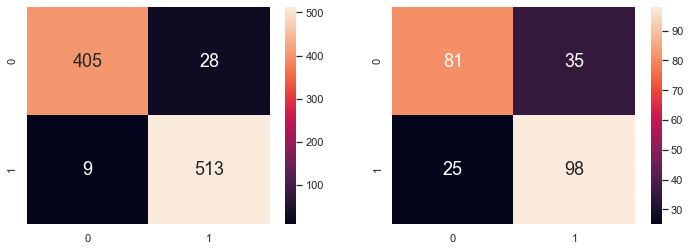

In [29]:
#train test split
X_train, X_test,y_train, y_test = train_test_split(X_new, y, test_size = 0.20)

#Decision Tree with train data
dectree = DecisionTreeClassifier(max_depth = 10)
dectree.fit(X_train,y_train)
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree


'''f = plt.figure(figsize=(100,100))
plot_tree(dectree, filled=True, rounded=True,
          feature_names = X.columns,
          class_names=["Not Good","Good"])'''



In [30]:
X_train

array([[ 3.57390567,  1.12749024, -0.1782009 , ..., -0.12792698,
        -0.75113197,  0.31708429],
       [ 3.31287728,  0.78340797, -1.10530244, ..., -1.11414342,
        -0.64704283, -1.52299812],
       [ 0.97654234,  0.65206573, -0.57906978, ..., -1.72943501,
         0.95073349,  0.64176359],
       ...,
       [-0.3197442 ,  1.38891875, -0.86040446, ...,  1.07759282,
         0.01844764, -0.15500104],
       [-1.8661646 ,  0.47529152, -1.09943248, ...,  1.31232687,
         0.26020621,  0.35701817],
       [ 2.2326982 ,  0.31074915,  1.90001249, ...,  0.57057615,
         1.32377801,  1.0551985 ]])

In [31]:
y_train.ravel()

array(['1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1',
       '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1',
       '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0',
       '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1',
       '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1',
       '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1',
       '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1',
       '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0',
       '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1

## RandomForest

### Cross Validation

In [32]:
from sklearn.ensemble import RandomForestClassifier

# #Cross Validation
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators': np.arange(800,1001,100),
#                 'max_depth': np.arange(6, 11)}

# hpGrid = GridSearchCV(RandomForestClassifier(),
#                       param_grid,
#                       cv = 5,
#                       scoring = 'accuracy')

# hpGrid.fit(X_train,y_train.ravel())

# print(hpGrid.best_estimator_)
# print(np.abs(hpGrid.best_score_))


Train Data
Accuracy  :	 0.987434554973822

TPR Train :	 0.9980842911877394
TNR Train :	 0.9745958429561201

FPR Train :	 0.025404157043879907
FNR Train :	 0.0019157088122605363


<AxesSubplot:>

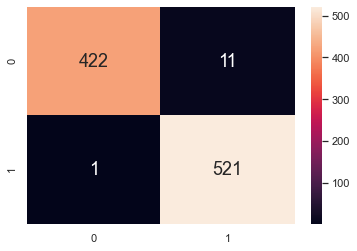

In [33]:
rforest = RandomForestClassifier(n_estimators = 800,
                                max_depth = 10)

rforest.fit(X_train,y_train)

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7949790794979079

TPR Test :	 0.8292682926829268
TNR Test :	 0.7586206896551724

FPR Test :	 0.2413793103448276
FNR Test :	 0.17073170731707318


<AxesSubplot:>

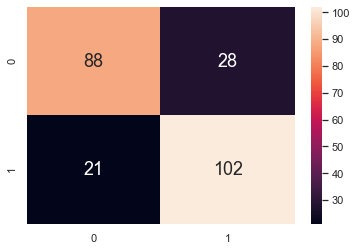

In [34]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test,nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[84 32]
 [37 86]]
71.1297071129707


## Neural Network

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e0fc3123-4c60-43aa-9d65-8fd5916147d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

mlp = MLPClassifier(hidden_layer_sizes=(11,11,11), activation='relu', solver='adam', max_iter=650)
mlp.fit(X_train,y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

print("Train Data:")

print(confusion_matrix(y_train, y_train_pred))
        
print(classification_report(y_train,y_train_pred))

print("Test Data:")

print(confusion_matrix(y_test, y_test_pred))
        
print(classification_report(y_test,y_test_pred))


Train Data:
[[366  67]
 [ 75 447]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       433
           1       0.87      0.86      0.86       522

    accuracy                           0.85       955
   macro avg       0.85      0.85      0.85       955
weighted avg       0.85      0.85      0.85       955

Test Data:
[[85 31]
 [26 97]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       116
           1       0.76      0.79      0.77       123

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239



C:\Users\xXDarkWolfXx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
# Save the model as serialized object pickle

import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(rforest, file)